In [ ]:
!pip install requests
!pip install newsapi-python
!pip install nltk
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install gensim


In [ ]:
import requests
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim import corpora


In [ ]:
nytimes_api_key = "JwmbAISGUUKEcDO545gv84IMdEo4z1Qu"
news_api_key = "c73fe959b80c4d84ae1bcf48b441bae0"


In [ ]:
newsapi = NewsApiClient(api_key=news_api_key)


In [ ]:
def fetch_news_articles(keywords, language='en', page_size=100):
    articles = []
    for keyword in keywords:
        response = newsapi.get_everything(q=keyword, language=language, page_size=page_size)
        articles.extend(response['articles'])
    return articles

keywords = ['real estate', 'house price', 'mortgage rate', 'house', 'housing affordability', 'United States']
articles = fetch_news_articles(keywords)

def display_articles(articles, num_articles=15):
    for idx, article in enumerate(articles[:num_articles]):
        print(f"Article {idx + 1}:")
        print("Title:", article['title'])
        print("Author:", article['author'])
        print("Content:", article['content'])
        print("")

display_articles(articles)



Article 1:
Title: 6 Ways AI is Changing Real Estate
Author: Brad Anderson
Content: The real estate industry, known for its reliance on traditional methods, is undergoing a major shift thanks to the integration of AI. From property valuations to customer service, AI is not only stre… [+8673 chars]

Article 2:
Title: How to Negotiate Mortgage Rates - CNET
Author: David McMillin
Content: Buying a house is all about negotiating. Youll want a seller to accept your offer, and then you might try to get some concessions to cover a portion of your closing costs. 
However, the negotiation … [+6801 chars]

Article 3:
Title: I bought my first home without an agent. I saved a ton of money — and my sanity.
Author: Albert Fox Cahn
Content: The best part of (briefly) having an agent was realizing just how much I had already figured out on my own.Sebastian König for BI
Last summer, when I told my then-girlfriend that I had just hired a … [+11214 chars]

Article 4:
Title: The case for ditching your real

In [ ]:
def fetch_news_articles(keywords, language='en', page_size=100):
    articles = []
    for keyword in keywords:
        response = newsapi.get_everything(q=keyword, language=language, page_size=page_size)
        articles.extend(response['articles'])
    return articles

keywords = ['real estate', 'house price', 'mortgage rate', 'house', 'housing affordability', 'United States']
articles = fetch_news_articles(keywords)

def display_articles(articles, num_articles=15):
    for idx, article in enumerate(articles[:num_articles]):
        print(f"Article {idx + 1}:")
        print("Title:", article['title'])
        print("Author:", article['author'])
        print("Content:", article['content'])
        print("")

display_articles(articles)


Article 1:
Title: 6 Ways AI is Changing Real Estate
Author: Brad Anderson
Content: The real estate industry, known for its reliance on traditional methods, is undergoing a major shift thanks to the integration of AI. From property valuations to customer service, AI is not only stre… [+8673 chars]

Article 2:
Title: How to Negotiate Mortgage Rates - CNET
Author: David McMillin
Content: Buying a house is all about negotiating. Youll want a seller to accept your offer, and then you might try to get some concessions to cover a portion of your closing costs. 
However, the negotiation … [+6801 chars]

Article 3:
Title: I bought my first home without an agent. I saved a ton of money — and my sanity.
Author: Albert Fox Cahn
Content: The best part of (briefly) having an agent was realizing just how much I had already figured out on my own.Sebastian König for BI
Last summer, when I told my then-girlfriend that I had just hired a … [+11214 chars]

Article 4:
Title: The case for ditching your real

In [ ]:
keywords = ['real estate', 'house price', 'mortgage rate', 'house', 'housing affordability', 'United States']
articles = fetch_news_articles(keywords)

print("Total number of articles:", len(articles))


Total number of articles: 600


In [ ]:
def display_articles(articles, num_articles=15):
    for idx, article in enumerate(articles[:num_articles]):
        print(f"Article {idx + 1}:")
        print("Title:", article['title'])
        print("Author:", article['author'])
        print("Content:", article['content'])
        # Extract publication year from 'publishedAt' field
        if article['publishedAt']:
            year_published = article['publishedAt'][:4]
            print("Year Published:", year_published)
        else:
            print("Year Published: Not available")
        print("")

# Display articles with publication year
display_articles(articles)


Article 1:
Title: 6 Ways AI is Changing Real Estate
Author: Brad Anderson
Content: The real estate industry, known for its reliance on traditional methods, is undergoing a major shift thanks to the integration of AI. From property valuations to customer service, AI is not only stre… [+8673 chars]
Year Published: 2024

Article 2:
Title: How to Negotiate Mortgage Rates - CNET
Author: David McMillin
Content: Buying a house is all about negotiating. Youll want a seller to accept your offer, and then you might try to get some concessions to cover a portion of your closing costs. 
However, the negotiation … [+6801 chars]
Year Published: 2024

Article 3:
Title: I bought my first home without an agent. I saved a ton of money — and my sanity.
Author: Albert Fox Cahn
Content: The best part of (briefly) having an agent was realizing just how much I had already figured out on my own.Sebastian König for BI
Last summer, when I told my then-girlfriend that I had just hired a … [+11214 chars]
Year Pub

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing and removal of stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Sentiment Analysis
def train_sentiment_model(X_train, y_train):
    # Initialize sentiment analyzer
    sentiment_analyzer = SentimentIntensityAnalyzer()
    # Train sentiment model (No training required for VADER)
    return sentiment_analyzer

def analyze_sentiment(text, sentiment_analyzer):
    # Analyze sentiment using VADER
    sentiment_scores = sentiment_analyzer.polarity_scores(text)
    return sentiment_scores['compound']  # Compound score ranges from -1 (most negative) to 1 (most positive)

# Topic Modeling
def perform_topic_modeling(articles_preprocessed):
    # Convert preprocessed text to a document-term matrix
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(articles_preprocessed)
    # Apply Latent Dirichlet Allocation (LDA)
    lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
    lda_model.fit(dtm)
    return lda_model, vectorizer

def display_topics(model, vectorizer, n_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}:")
        print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-n_words - 1:-1]])

# Preprocess articles
articles_preprocessed = []
for article in articles:
    if article['content']:
        preprocessed_text = preprocess_text(article['content'])
        articles_preprocessed.append(' '.join(preprocessed_text))

# Sentiment Analysis
sentiment_analyzer = train_sentiment_model(None, None)  # No training required for VADER

# Topic Modeling
lda_model, vectorizer = perform_topic_modeling(articles_preprocessed)

# Display Topics
print("Top words in each topic:")
display_topics(lda_model, vectorizer)

# Analyze sentiment and display results
for idx, article in enumerate(articles[:15]):
    print(f"Article {idx + 1}:")
    print("Title:", article['title'])
    print("Author:", article['author'])
    print("Content:", article['content'])
    sentiment_score = analyze_sentiment(article['content'], sentiment_analyzer)
    print("Sentiment Score:", sentiment_score)
    print("")

# Additional functionality such as sentiment classification using machine learning models can be added if desired.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Top words in each topic:
Topic 1:
['house', 'image', 'trump', 'donald', 'united', 'state', 'new', 'speaker', 'government', 'president']
Topic 2:
['rate', 'mortgage', 'today', 'week', 'market', 'home', 'house', 'average', 'refinance', 'high']
Topic 3:
['housing', 'new', 'market', 'home', 'estate', 'state', 'city', 'real', 'rate', 'house']
Topic 4:
['home', 'et', 'image', 'estate', 'real', 'year', 'sale', 'housing', 'getty', 'price']
Topic 5:
['home', 'house', 'price', 'new', 'image', 'partner', 'february', 'sale', 'march', 'january']
Article 1:
Title: 6 Ways AI is Changing Real Estate
Author: Brad Anderson
Content: The real estate industry, known for its reliance on traditional methods, is undergoing a major shift thanks to the integration of AI. From property valuations to customer service, AI is not only stre… [+8673 chars]
Sentiment Score: 0.4404

Article 2:
Title: How to Negotiate Mortgage Rates - CNET
Author: David McMillin
Content: Buying a house is all about negotiating. Youll wa

In [ ]:
def assign_sentiment_label(sentiment_score, threshold=0.05):
    if sentiment_score >= threshold:
        return 'positive'
    elif sentiment_score <= -threshold:
        return 'negative'
    else:
        return 'neutral'

# Analyze sentiment and assign sentiment labels
for idx, article in enumerate(articles[:15]):
    print(f"Article {idx + 1}:")
    print("Title:", article['title'])
    print("Author:", article['author'])
    print("Content:", article['content'])
    sentiment_score = analyze_sentiment(article['content'], sentiment_analyzer)
    sentiment_label = assign_sentiment_label(sentiment_score)
    print("Sentiment Label:", sentiment_label)
    print("")


Article 1:
Title: 6 Ways AI is Changing Real Estate
Author: Brad Anderson
Content: The real estate industry, known for its reliance on traditional methods, is undergoing a major shift thanks to the integration of AI. From property valuations to customer service, AI is not only stre… [+8673 chars]
Sentiment Label: positive

Article 2:
Title: How to Negotiate Mortgage Rates - CNET
Author: David McMillin
Content: Buying a house is all about negotiating. Youll want a seller to accept your offer, and then you might try to get some concessions to cover a portion of your closing costs. 
However, the negotiation … [+6801 chars]
Sentiment Label: positive

Article 3:
Title: I bought my first home without an agent. I saved a ton of money — and my sanity.
Author: Albert Fox Cahn
Content: The best part of (briefly) having an agent was realizing just how much I had already figured out on my own.Sebastian König for BI
Last summer, when I told my then-girlfriend that I had just hired a … [+11214 chars

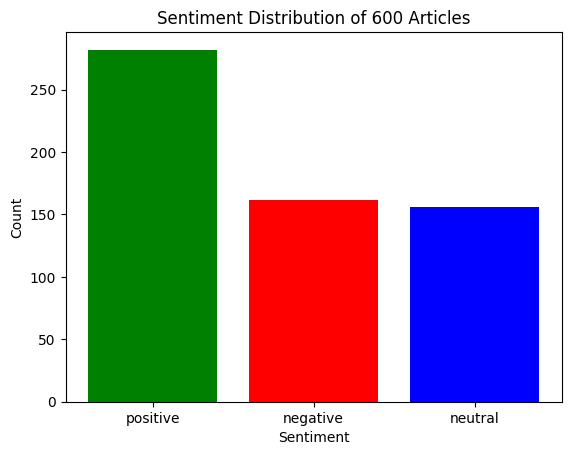

In [ ]:
def aggregate_sentiment_labels(articles):
    sentiment_counts = {'positive': 0, 'negative': 0, 'neutral': 0}
    for article in articles:
        sentiment_score = analyze_sentiment(article['content'], sentiment_analyzer)
        sentiment_label = assign_sentiment_label(sentiment_score)
        sentiment_counts[sentiment_label] += 1
    return sentiment_counts

# Aggregate sentiment labels for all articles
sentiment_counts_all = aggregate_sentiment_labels(articles)

# Plotting the bar chart
labels = sentiment_counts_all.keys()
counts = sentiment_counts_all.values()

plt.bar(labels, counts, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of 600 Articles')
plt.show()


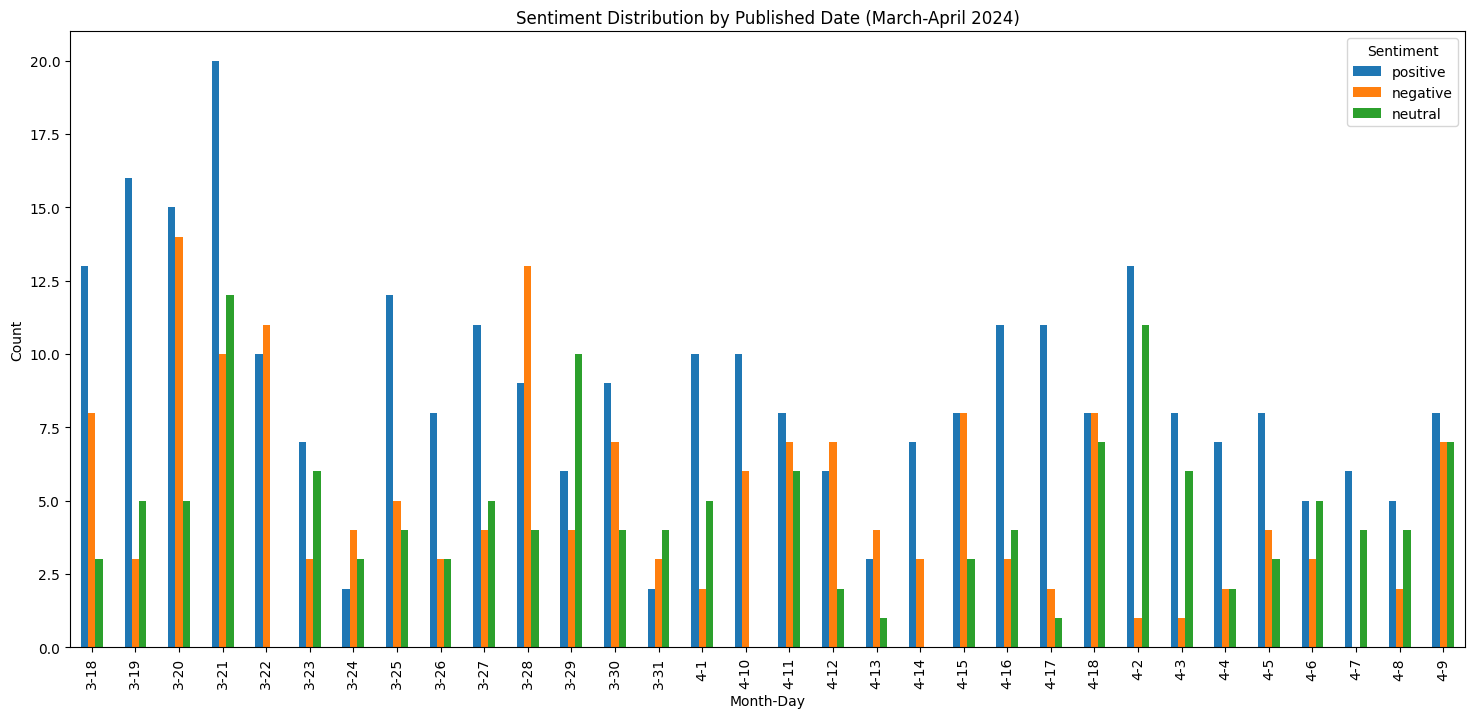

In [ ]:
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

# Function to filter articles for a specific month and year
def filter_articles_by_month_and_year(articles, year, month):
    filtered_articles = []
    for article in articles:
        if article['publishedAt']:
            published_date = datetime.strptime(article['publishedAt'], '%Y-%m-%dT%H:%M:%SZ')
            if published_date.year == year and published_date.month == month:
                filtered_articles.append(article)
    return filtered_articles

# Function to arrange sentiment by published date
def arrange_sentiment_by_date(articles):
    sentiment_by_date = defaultdict(lambda: {'positive': 0, 'negative': 0, 'neutral': 0})
    for article in articles:
        published_date = datetime.strptime(article['publishedAt'], '%Y-%m-%dT%H:%M:%SZ')
        sentiment_score = analyze_sentiment(article['content'], sentiment_analyzer)
        sentiment_label = assign_sentiment_label(sentiment_score)
        sentiment_by_date[f"{published_date.month}-{published_date.day}"][sentiment_label] += 1
    return sentiment_by_date

# Fetch articles for March and April 2024
articles_march_2024 = filter_articles_by_month_and_year(articles, 2024, 3)
articles_april_2024 = filter_articles_by_month_and_year(articles, 2024, 4)
articles_march_april_2024 = articles_march_2024 + articles_april_2024

# Arrange sentiment by published date
sentiment_by_date = arrange_sentiment_by_date(articles_march_april_2024)

# Convert sentiment counts by date to DataFrame for visualization
sentiment_df_by_date = pd.DataFrame(sentiment_by_date).T

# Sort the DataFrame by index (date)
sentiment_df_by_date_sorted = sentiment_df_by_date.sort_index()

# Plotting the sentiment counts by date
sentiment_df_by_date_sorted.plot(kind='bar', figsize=(18, 8))
plt.xlabel('Month-Day')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Published Date (March-April 2024)')
plt.legend(title='Sentiment')
plt.show()


In [ ]:
# Function to filter articles for a specific month and year
def filter_articles_by_month_and_year(articles, year, month):
    filtered_articles = []
    for article in articles:
        if article['publishedAt']:
            published_date = datetime.strptime(article['publishedAt'], '%Y-%m-%dT%H:%M:%SZ')
            if published_date.year == year and published_date.month == month:
                filtered_articles.append(article)
    return filtered_articles

# Function to analyze sentiment and classify articles as positive
def analyze_sentiment_and_filter_positive(articles):
    positive_articles = []
    for article in articles:
        sentiment_score = analyze_sentiment(article['content'], sentiment_analyzer)
        sentiment_label = assign_sentiment_label(sentiment_score)
        if sentiment_label == 'positive':
            positive_articles.append(article)
    return positive_articles

# Fetch articles for March and April 2024
articles_march_2024 = filter_articles_by_month_and_year(articles, 2024, 3)
articles_april_2024 = filter_articles_by_month_and_year(articles, 2024, 4)
articles_march_april_2024 = articles_march_2024 + articles_april_2024

# Analyze sentiment and filter positive articles
positive_articles_march_april_2024 = analyze_sentiment_and_filter_positive(articles_march_april_2024)

# Extract key real estate indicators mentioned in positive articles
real_estate_indicators = []
for article in positive_articles_march_april_2024:
    # Here you would need to implement logic to extract key real estate indicators mentioned in the article.
    # This could involve using natural language processing techniques such as named entity recognition or keyword extraction.
    # For example, you could search for terms like "home prices," "housing market," "mortgage rates," etc.
    # For demonstration purposes, let's assume we extract indicators based on certain keywords:
    indicators = ['home prices', 'housing market', 'mortgage rates', 'real estate investment']
    for indicator in indicators:
        if indicator in article['content'].lower():
            real_estate_indicators.append(indicator)

# Display unique real estate indicators mentioned in positive articles
unique_real_estate_indicators = set(real_estate_indicators)
print("Real Estate Indicators Mentioned in Positive Articles:")
for indicator in unique_real_estate_indicators:
    print("-", indicator)


Real Estate Indicators Mentioned in Positive Articles:
- mortgage rates
- housing market
- home prices


In [ ]:
# Function to analyze sentiment and classify articles as negative
def analyze_sentiment_and_filter_negative(articles):
    negative_articles = []
    for article in articles:
        sentiment_score = analyze_sentiment(article['content'], sentiment_analyzer)
        sentiment_label = assign_sentiment_label(sentiment_score)
        if sentiment_label == 'negative':
            negative_articles.append(article)
    return negative_articles

# Analyze sentiment and filter negative articles
negative_articles_march_april_2024 = analyze_sentiment_and_filter_negative(articles_march_april_2024)

# Extract key real estate indicators mentioned in negative articles
negative_real_estate_indicators = []
for article in negative_articles_march_april_2024:
    # Here you would need to implement logic to extract key real estate indicators mentioned in the article.
    # This could involve using natural language processing techniques such as named entity recognition or keyword extraction.
    # For example, you could search for terms like "home prices," "housing market," "mortgage rates," etc.
    # For demonstration purposes, let's assume we extract indicators based on certain keywords:
    indicators = ['foreclosure', 'housing crisis', 'housing bubble', 'mortgage default']
    for indicator in indicators:
        if indicator in article['content'].lower():
            negative_real_estate_indicators.append(indicator)

# Display unique real estate indicators mentioned in negative articles
unique_negative_real_estate_indicators = set(negative_real_estate_indicators)
print("Real Estate Indicators Mentioned in Negative Articles:")
for indicator in unique_negative_real_estate_indicators:
    print("-", indicator)


Real Estate Indicators Mentioned in Negative Articles:
- foreclosure
- housing crisis


In [ ]:
# Define a function to print snippet of articles containing specified indicators
def print_articles_with_indicators(articles, indicators):
    for article in articles:
        for indicator in indicators:
            if indicator in article['content'].lower():
                print("Title:", article['title'])
                # Extract a snippet of the content (first 200 characters)
                snippet = article['content'][:200] + '...' if len(article['content']) > 200 else article['content']
                print("Content Snippet:", snippet)
                print()

# Print snippet of articles containing identified real estate indicators in positive articles
print("Positive Articles with Real Estate Indicators:")
print_articles_with_indicators(positive_articles_march_april_2024, unique_real_estate_indicators)

# Print snippet of articles containing identified real estate indicators in negative articles
print("Negative Articles with Real Estate Indicators:")
print_articles_with_indicators(negative_articles_march_april_2024, unique_negative_real_estate_indicators)


Positive Articles with Real Estate Indicators:
Title: Wednesday: FOMC Statement
Content Snippet: Note: Mortgage rates are from MortgageNewsDaily.com and are for top tier scenarios.

Wednesday:
• At 7:00 AM ET, The Mortgage Bankers Association (MBA) will release the results for the mortgage purch…...

Title: 2 reasons why the South will stay the hottest housing market in the US
Content Snippet: Attorney-opinion letters could save homebuyers thousands of dollars in closing costs.Nick White/Getty Images
<ul>
<li>The hottest housing market in America is poised to see continued price gains, ac…...

Title: Tuesday: Case-Shiller House Prices, Durable Goods, Richmond and Dallas Fed Mfg
Content Snippet: From Matthew Graham at Mortgage News Daily: Mortgage Rates Basically Unchanged Over The WeekendMortgage rates enjoyed a decently strong week last week, with the average top tier conventional 30yr fix…...

Title: Mortgage Rates Increase for Prospective Buyers: Mortgage Rates for March 19, 2024 - 

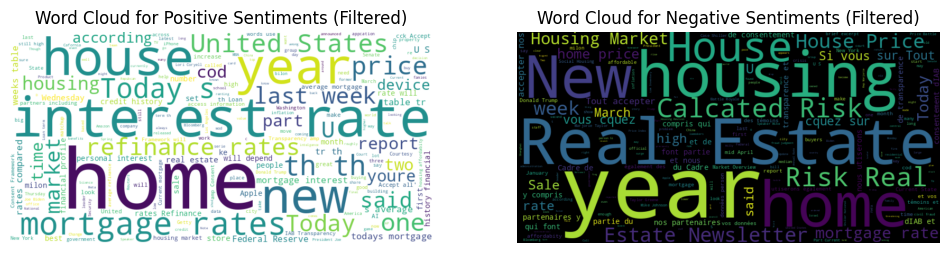

In [ ]:
# Remove specific words from text data
def remove_words(text, words):
    for word in words:
        text = text.replace(word, '')
    return text

# Words to remove
words_to_remove = ['chars', 'Getty Images', 'ul', 'li']

# Remove specified words from positive and negative text data
positive_text_filtered = remove_words(positive_text, words_to_remove)
negative_text_filtered = remove_words(negative_text, words_to_remove)

# Generate word cloud for positive sentiments
wordcloud_positive_filtered = WordCloud(width=800, height=400, background_color='white').generate(positive_text_filtered)

# Generate word cloud for negative sentiments
wordcloud_negative_filtered = WordCloud(width=800, height=400, background_color='black').generate(negative_text_filtered)

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive_filtered, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiments (Filtered)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative_filtered, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiments (Filtered)')
plt.axis('off')

plt.show()


In [ ]:
# Function to outline sentiment and publication date for articles
def outline_sentiment_and_date(articles):
    for idx, article in enumerate(articles[:15], 1):
        published_date = datetime.strptime(article['publishedAt'], '%Y-%m-%dT%H:%M:%SZ').strftime('%Y-%m-%d')
        sentiment_score = analyze_sentiment(article['content'], sentiment_analyzer)
        sentiment_label = assign_sentiment_label(sentiment_score)
        print(f"Article {idx}:")
        print("Title:", article['title'])
        print("Sentiment:", sentiment_label)
        print("Published Date:", published_date)
        print()

# Outline sentiment and publication date for the top 15 articles
print("Top 15 Articles:")
outline_sentiment_and_date(articles)


Top 15 Articles:
Article 1:
Title: 6 Ways AI is Changing Real Estate
Sentiment: positive
Published Date: 2024-03-19

Article 2:
Title: How to Negotiate Mortgage Rates - CNET
Sentiment: positive
Published Date: 2024-04-02

Article 3:
Title: I bought my first home without an agent. I saved a ton of money — and my sanity.
Sentiment: positive
Published Date: 2024-04-18

Article 4:
Title: The case for ditching your real-estate agent when buying a home is gaining momentum
Sentiment: neutral
Published Date: 2024-04-18

Article 5:
Title: No, the NAR Real Estate Settlement Probably Won't Drive Down Home Prices. Here's Why - CNET
Sentiment: positive
Published Date: 2024-03-27

Article 6:
Title: Vietnam wants to take China's place as a new factory of the world — but a $12 billion financial fraud case is getting in the way
Sentiment: neutral
Published Date: 2024-04-12

Article 7:
Title: US reindustrialization will be the top investment theme of coming decades, RBA says
Sentiment: positive
Publishe

In [ ]:
import pandas as pd

# Function to outline sentiment, sentiment scores, and publication date for articles
def outline_sentiment_and_date_with_scores(articles):
    data = []
    for idx, article in enumerate(articles[:15], 1):
        published_date = datetime.strptime(article['publishedAt'], '%Y-%m-%dT%H:%M:%SZ').strftime('%Y-%m-%d')
        sentiment_score = analyze_sentiment(article['content'], sentiment_analyzer)
        sentiment_label = assign_sentiment_label(sentiment_score)
        data.append([idx, article['title'], sentiment_label, sentiment_score, published_date])

    # Create DataFrame
    df = pd.DataFrame(data, columns=['Index', 'Title', 'Sentiment Label', 'Sentiment Score', 'Published Date'])
    return df

# Outline sentiment, sentiment scores, and publication date for the top 15 articles in a table
df_articles = outline_sentiment_and_date_with_scores(articles)
print(df_articles)


    Index                                              Title Sentiment Label  \
0       1                  6 Ways AI is Changing Real Estate        positive   
1       2             How to Negotiate Mortgage Rates - CNET        positive   
2       3  I bought my first home without an agent. I sav...        positive   
3       4  The case for ditching your real-estate agent w...         neutral   
4       5  No, the NAR Real Estate Settlement Probably Wo...        positive   
5       6  Vietnam wants to take China's place as a new f...         neutral   
6       7  US reindustrialization will be the top investm...        positive   
7       8  Commercial real estate foreclosures have spike...        negative   
8       9  Why buying a home isn't likely to get much che...        negative   
9      10  The freefall in China's home prices continued ...         neutral   
10     11  China officials are reportedly pushing banks t...        positive   
11     12  Risky commercial real estate 

In [ ]:
import pandas as pd

# Function to outline sentiment, sentiment scores, and publication date for articles
def outline_sentiment_and_date_with_scores(articles):
    data = []
    count = 0
    for article in articles:
        # Skip articles related to China
        if 'china' in article['content'].lower() or 'china' in article['title'].lower():
            continue

        published_date = datetime.strptime(article['publishedAt'], '%Y-%m-%dT%H:%M:%SZ').strftime('%Y-%m-%d')
        sentiment_score = analyze_sentiment(article['content'], sentiment_analyzer)
        sentiment_label = assign_sentiment_label(sentiment_score)
        data.append([article['title'], sentiment_label, sentiment_score, published_date])
        count += 1
        if count == 15:
            break

    # Create DataFrame
    df = pd.DataFrame(data, columns=['Title', 'Sentiment Label', 'Sentiment Score', 'Published Date'])
    return df

# Outline sentiment, sentiment scores, and publication date for the top 15 articles (excluding China-related articles) in a table
df_articles = outline_sentiment_and_date_with_scores(articles)
print(df_articles.to_string(index=False))


                                                                                                                                                  Title Sentiment Label  Sentiment Score Published Date
                                                                                                                      6 Ways AI is Changing Real Estate        positive           0.4404     2024-03-19
                                                                                                                 How to Negotiate Mortgage Rates - CNET        positive           0.4404     2024-04-02
                                                                       I bought my first home without an agent. I saved a ton of money — and my sanity.        positive           0.6369     2024-04-18
                                                                    The case for ditching your real-estate agent when buying a home is gaining momentum         neutral           0.0000     2024-04-18
